In [145]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Matplotlib.dates provides date plotting capabilities
import matplotlib.dates as mdates

In [146]:
#Read in the CSV
data = 'owid-covid-data.csv'
covid_data = pd.read_csv(data)

# Fill Missing Data with 0
covid_data = covid_data.fillna(0)

In [147]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


# Identify The Most Populated Country From Each Continent

In [148]:
# Select Required Columns
population_data = covid_data[['continent','location','population' ]]

In [149]:
# Drop Dulicate Population Values
population_data = population_data.drop_duplicates(subset=['population'])

# Sort Population Collumn by Value 
population_data = population_data.sort_values(by='population', ascending=False)

In [150]:
# display one row only COMMENTED OUT AFTER RUNNING CELLS 
pd.set_option('display.max_rows', 1) 

In [151]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Africa = population_data['continent'] == 'Africa'

Covid_Data_Africa = population_data[Covid_Data_Africa]
Covid_Data_Africa

,continent,location,population
135413,Africa,Nigeria,213401323.0


In [152]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Asia = population_data['continent'] == 'Asia'

Covid_Data_Asia = population_data[Covid_Data_Asia]
Covid_Data_Asia

,continent,location,population
38236,Asia,China,1.425893e+09


In [153]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Europe = population_data['continent'] == 'Europe'

Covid_Data_Europe = population_data[Covid_Data_Europe]
Covid_Data_Europe

,continent,location,population
153934,Europe,Russia,145102755.0


In [154]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_NorthAmerica = population_data['continent'] == 'North America'

Covid_Data_NorthAmerica = population_data[Covid_Data_NorthAmerica]
Covid_Data_NorthAmerica

,continent,location,population
195365,North America,United States,336997624.0


In [155]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_SouthAmerica = population_data['continent'] == 'South America'

Covid_Data_SouthAmerica = population_data[Covid_Data_SouthAmerica]
Covid_Data_SouthAmerica

,continent,location,population
25828,South America,Brazil,214326223.0


In [156]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Oceania = population_data['continent'] == 'Oceania'

Covid_Data_Oceania = population_data[Covid_Data_Oceania]
Covid_Data_Oceania

,continent,location,population
10780,Oceania,Australia,25921089.0


# Select New Collumns

In [157]:
covid_data = covid_data[['new_deaths_smoothed_per_million', 'new_cases_smoothed', 'continent', 'location', 'date', 'population', 'total_cases', 'total_tests', 'positive_rate', 'total_vaccinations', 'people_fully_vaccinated' ]]
covid_data.head()

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
0,0.0,0.0,Asia,Afghanistan,2020-02-24,40099462.0,5.0,0.0,0.0,0.0,0.0


# PLOT: new deaths smoothed per million

In [158]:
# Define / Grab the data contained within the "location" column | DataFrames

nigeria = covid_data.loc[(covid_data['location'] == 'Nigeria'),:]
china = covid_data.loc[(covid_data['location'] == 'China'),:]
russia = covid_data.loc[(covid_data['location'] == 'Russia'),:]
united_states = covid_data.loc[(covid_data['location'] == 'United States'),:]
brazil = covid_data.loc[(covid_data['location'] == 'Brazil'),:]
australia = covid_data.loc[(covid_data['location'] == 'Australia'),:]

In [159]:
# Used to have the x axis display Months
    # .astype - Cast a pandas object to a specified dtype
        # (datetime64[ns, tz]) from ASKBCS assistant * could also use ----> to_datetime() <----  

nigeria['date'] = nigeria['date'].astype('datetime64[ns]')
china['date'] = china['date'].astype('datetime64[ns]')
russia['date'] = russia['date'].astype('datetime64[ns]')
united_states['date'] = united_states['date'].astype('datetime64[ns]')
brazil['date'] = nigeria['date'].astype('datetime64[ns]')
australia['date'] = australia['date'].astype('datetime64[ns]')

/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# When Was The Vaccine Avaliable For Each Country

In [160]:
# nigeria - August 2021
# china - June 2020
# russia - October 2020
# united_states - December 2020
# brazil - March 2022
# australia - January 2022

# .head or .tail to find out the top position or the botttom value of a collumn

In [161]:
# nigeria
nigeria_vacdate = nigeria.loc[(nigeria['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

In [162]:
# china
china_vacdate = china.loc[(china['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

In [163]:
# russia
russia_vacdate = russia.loc[(russia['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

In [164]:
# united_states
USA_vacdate = united_states.loc[(united_states['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

In [165]:
# brazil
brazil_vacdate = brazil.loc[(brazil['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

In [166]:
# australia
australia_vacdate = australia.loc[(australia['total_vaccinations'] > 0), :]
vacdate["date"].head(1) 

11172    2021-02-21
Name: date, dtype: object

# ---------------------------------------------------------------

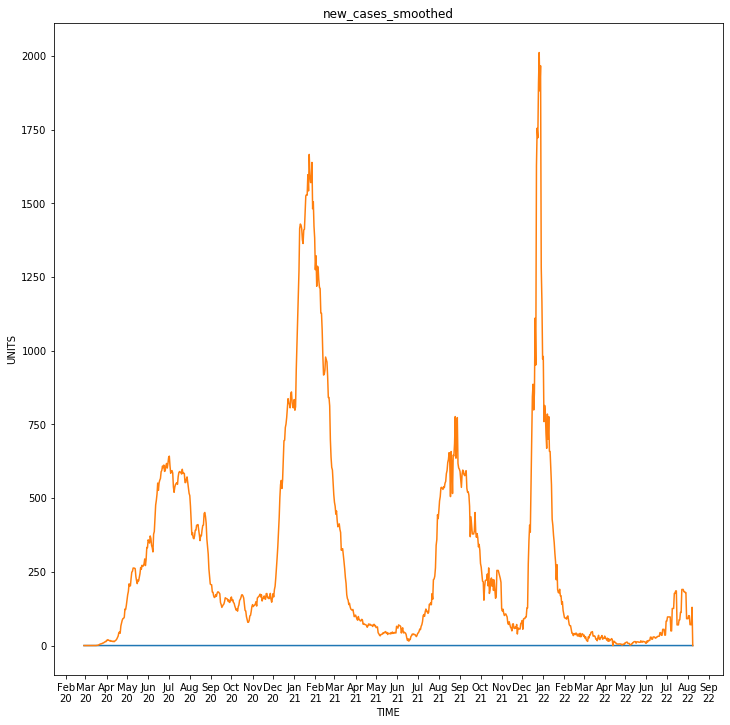

In [167]:
# nigeria
x = nigeria['date']
y = nigeria['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

ax.plot(x,y)

x = nigeria['date']
y_ncm = nigeria['new_cases_smoothed']

ax.plot(x,y_ncm)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

plt.show()

In [ ]:
# china
x = china['date']
y = china['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# russia
x = russia['date']
y = russia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# united_states
x = united_states['date']
y = united_states['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# brazil
x = brazil['date']
y = brazil['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# australia
x = australia['date']
y = australia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# PLOT: new cases smoothed

In [ ]:
# nigeria
x = nigeria['date']
y = nigeria['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# china
x = china['date']
y = china['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# russia
x = russia['date']
y = russia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# united_states
x = united_states['date']
y = united_states['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# brazil
x = brazil['date']
y = brazil['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [ ]:
# australia
x = australia['date']
y = australia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()